# Facebook Dataset

## Work By- 

**Ravjot Singh**

E-mail: ravjot313@gmail.com

M: +91-9654446404

LinkedIn: https://www.linkedin.com/in/ravjot-singh-1a0777149/

Github: https://github.com/Ravjot03

Medium: https://medium.com/@ravjot313_65826

## Importing the required libraries

In [0]:
import numpy as np 
import pandas as pd 
from keras.utils import np_utils
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## Reading the dataset using pandas

In [0]:
df = pd.read_csv('dataset_Facebook.csv')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Exploratory Data Analysis (EDA)

### 1.Correlation Matrix

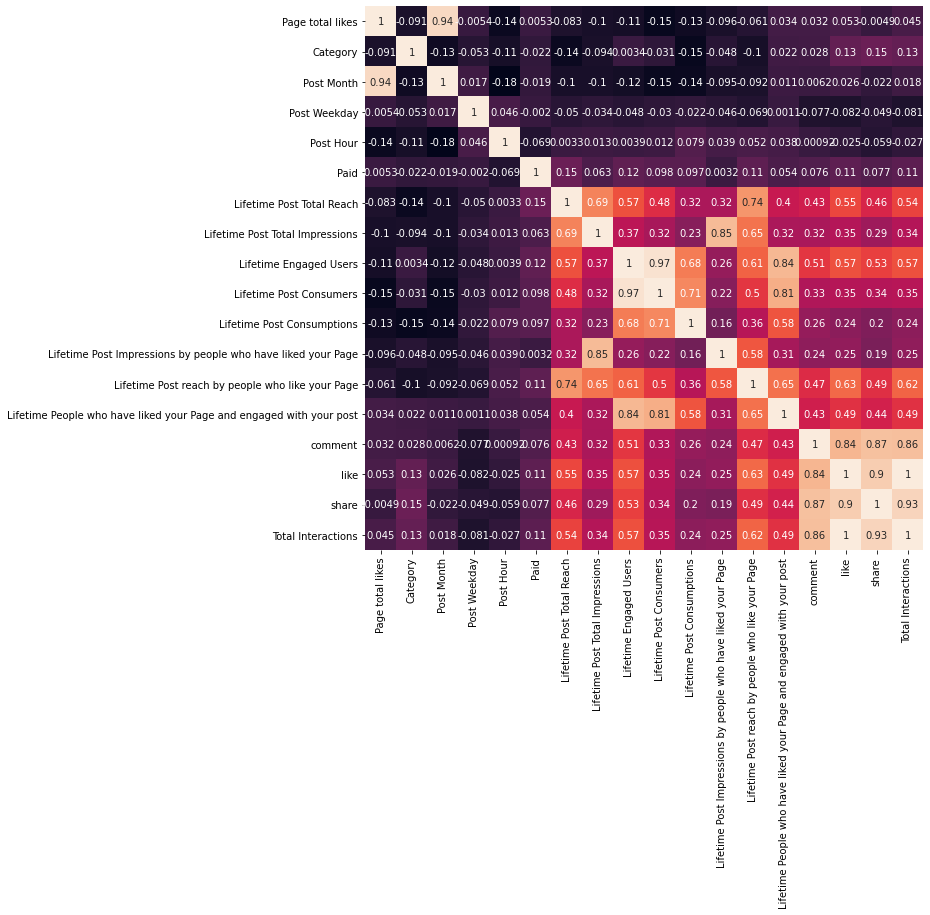

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cbar=False)

### 2.Total Page Likes

Text(0.5, 1.0, 'Total pages likes')

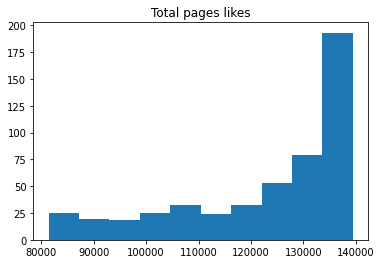

In [0]:
plt.hist(df.loc[:,'Page total likes'])
plt.title("Total pages likes")

### 3.Category of Posts

Text(0.5, 1.0, 'Different types of post compared')

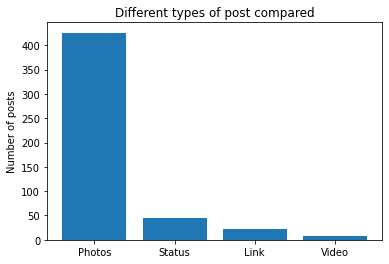

In [0]:
objects = ('Photos', 'Status', 'Link', 'Video')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.loc[:,'Type'].value_counts().values)
plt.xticks(y_pos, objects)
plt.ylabel('Number of posts')
plt.title('Different types of post compared')

### 4.Category of posts whether paid or not

Text(0, 0.5, 'Number of posts')

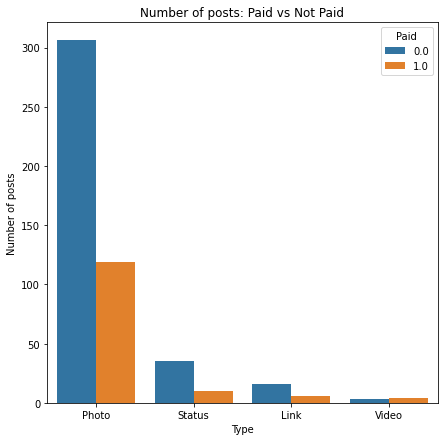

In [0]:
plt.figure(figsize=(7,7))

sns.countplot(x='Type',hue='Paid',data=df)
plt.title("Number of posts: Paid vs Not Paid")
plt.ylabel("Number of posts")

### 5.Posts per month

Text(0.5, 1.0, 'Number of posts for each month')

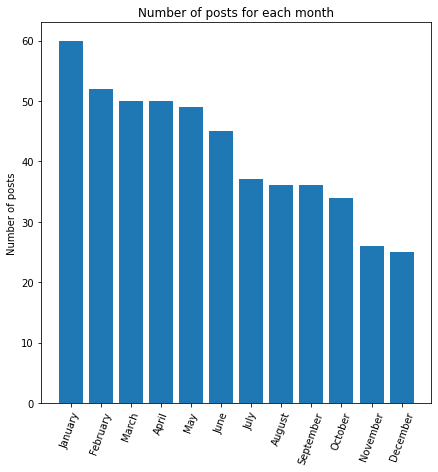

In [0]:
plt.figure(figsize=(7,7))

objects = ('January', 'February', 'March', 'April','May','June','July','August','September','October','November','December')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.loc[:,'Post Month'].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each month')

### 6.Posts per Weekday

Text(0.5, 1.0, 'Number of posts for each weekday')

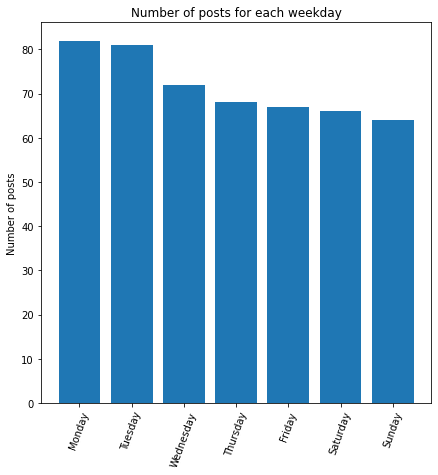

In [0]:
plt.figure(figsize=(7,7))

objects = ('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.loc[:,'Post Weekday'].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts for each weekday')

### 7.Posts Paid or Free

Text(0.5, 1.0, 'Number of posts: Free vs Paid')

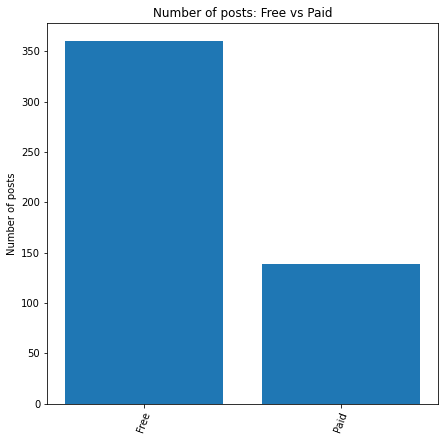

In [0]:
plt.figure(figsize=(7,7))

objects = ('Free', 'Paid')
y_pos = np.arange(len(objects))

plt.bar(y_pos, df.loc[:,'Paid'].value_counts().values)
plt.xticks(y_pos, objects, rotation=70)
plt.ylabel('Number of posts')
plt.title('Number of posts: Free vs Paid')

### 8.Post paid or free per Month and per Weekday

Text(0.5, 1.0, 'Number of posts: Free vs Paid per Weekday')

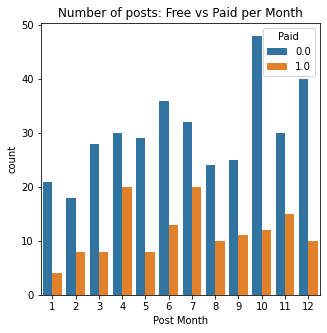

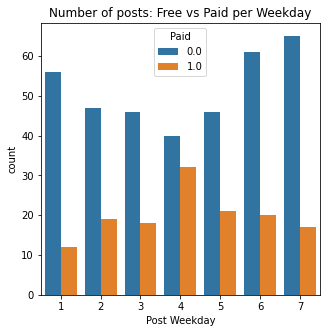

In [0]:
plt.figure(figsize=(5,5))
sns.countplot(x='Post Month',hue='Paid',data=df)
plt.title("Number of posts: Free vs Paid per Month")

plt.figure(figsize=(5,5)) 
sns.countplot(x='Post Weekday',hue='Paid',data=df)
plt.title("Number of posts: Free vs Paid per Weekday")

### 9.Comments

Text(0.5, 1.0, 'Comments per post distribution')

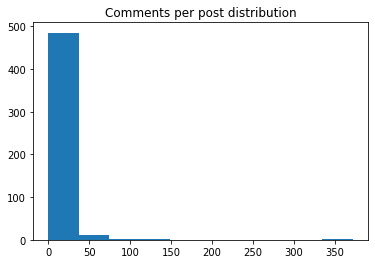

In [0]:
plt.hist(df.loc[:,'comment'])
plt.title("Comments per post distribution")

### 10.Likes

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Likes per post distribution')

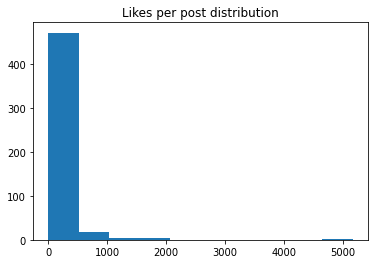

In [0]:
plt.hist(df.loc[:,'like'])
plt.title("Likes per post distribution")

### 11.Shares

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Shares per post distribution')

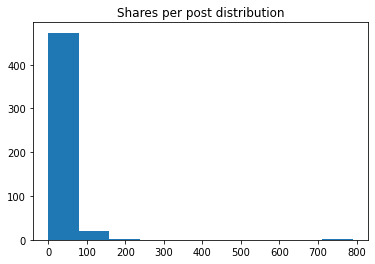

In [0]:
plt.hist(df.loc[:,'share'])
plt.title("Shares per post distribution")

### 12.Lifetime Data Analysis

<Figure size 504x504 with 0 Axes>

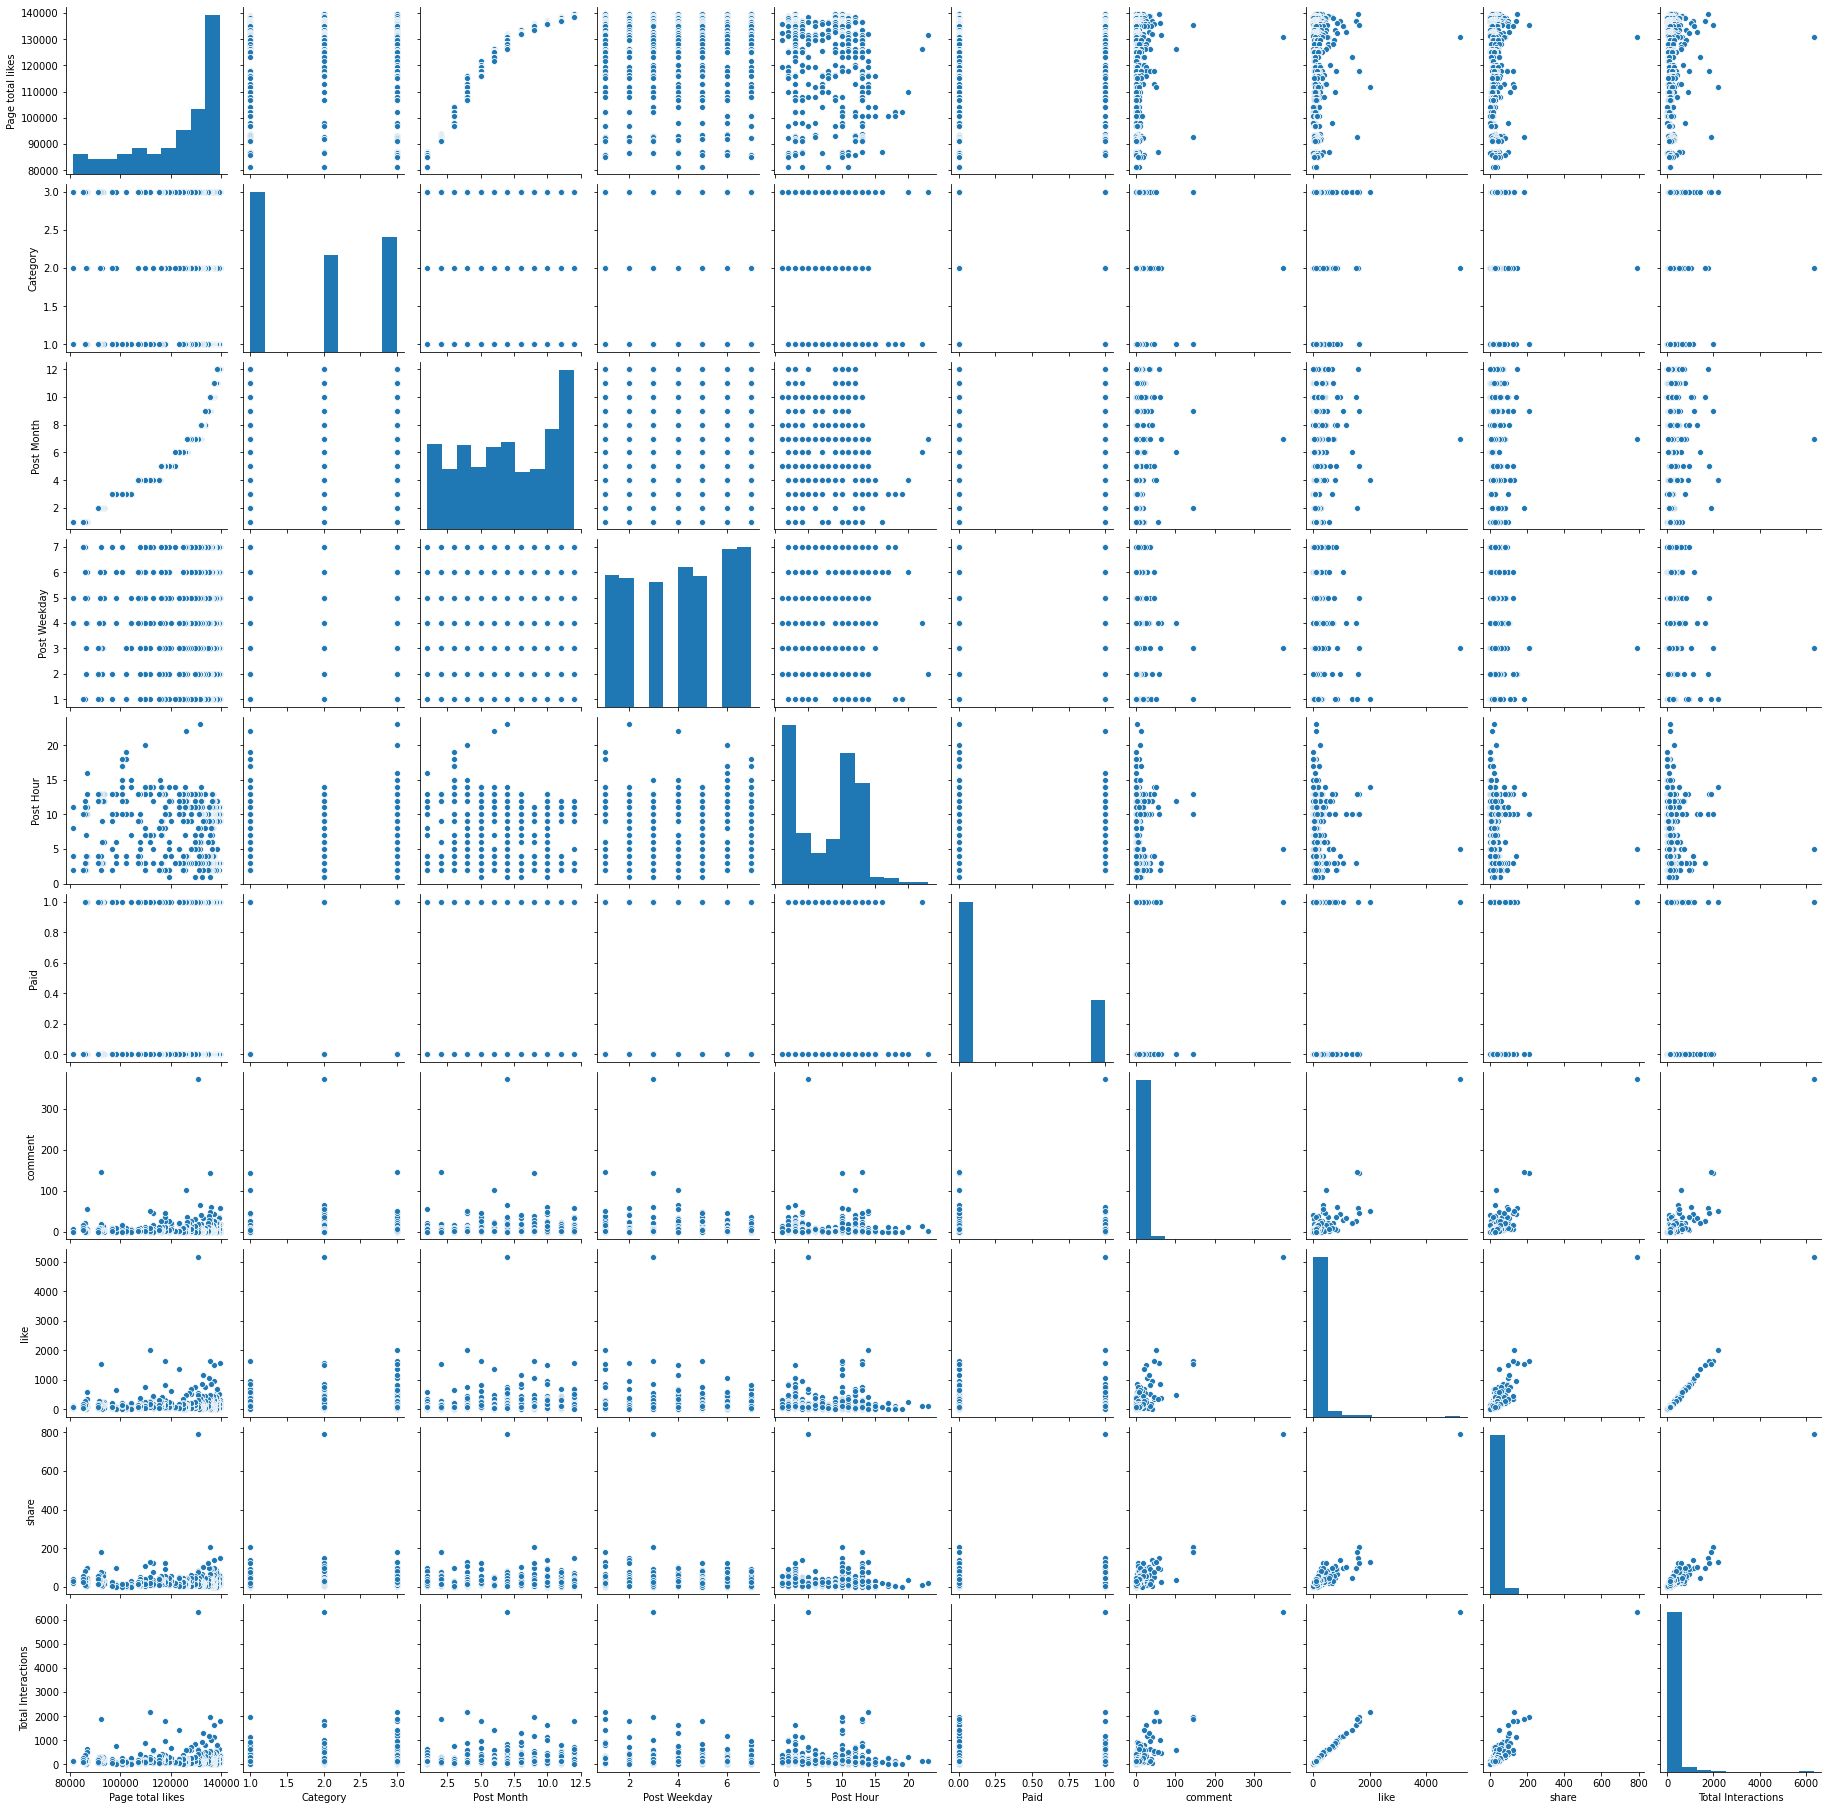

<Figure size 504x504 with 0 Axes>

In [0]:
dfplot = df.drop(df.columns[7:15],axis =1)
sns.pairplot(data=dfplot)
plt.figure(figsize=(7,7))

## Machine Learning Part

In [0]:
lb_make = LabelEncoder()
df["Type"] = lb_make.fit_transform(df["Type"])
df = df.fillna(0)
df.head(5)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


### Dividing the data into features and target variables and further separating the data into training and test sets

In [0]:
X = df.drop(['like'], axis = 1).values
y = df['like'].values

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Linear Regression Model

In [0]:
reg = LinearRegression()

reg.fit(X_train,y_train)
print("Training Score:",reg.score(X_train,y_train))
y_pred = reg.predict(X_test)
print("Test Score:",reg.score(X_test, y_test))

Training Score: 1.0
Test Score: 1.0


In [0]:
r2s = np.sqrt(r2_score(y_test, y_pred))
print("R2 Score: %f" % (r2s))

R2 Score: 1.000000


## Random Forest Regressor Model

In [0]:
rf = RandomForestRegressor(n_estimators=500,min_samples_split=10)

rf.fit(X_train,y_train)

p_train = rf.predict(X_train)
p_test = rf.predict(X_test)


In [0]:
train_acc = r2_score(y_train, p_train)
test_acc = r2_score(y_test, p_test)

print("Training Score: ", train_acc)
print("Test Score: ", test_acc)

Training Score:  0.9042280462485686
Test Score:  0.9612875923911884


In [0]:
r2s = np.sqrt(r2_score(y_test, p_test))
print("R2 Score: %f" % (r2s))

R2 Score: 0.980453
